<a href="https://colab.research.google.com/github/sherna90/analisis_algoritmos/blob/master/6.-tsp_or_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ssl
!pip install haversine
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ssl (from versions: 1.15, 1.16)
ERROR: No matching distribution found for ssl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.5 MB 5.8 MB/s 
     |████████████████████████████████| 407 kB 53.2 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.1 which i

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd

In [4]:
distance=2
url='https://puntoslimpios.mma.gob.cl/api/points/geo?lat=-35.4232444&lng=-71.6484804&distance={}'.format(distance)

In [5]:
df=pd.read_json(url)

In [6]:
df

,distance,lat,status,lng,owner,type,address_type,manager,address_number,address_name,region,commune,materials
0,0.415525,-35.425537,open,-71.644859,CRISTORO,pv,,CRISTORO,,2 Norte,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[glass]
1,0.435133,-35.425625,open,-71.644669,CRISTORO,pv,,CRISTORO,,2 Norte,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[glass]
2,0.563316,-35.419284,open,-71.652357,Claudia Mocárquer,pv,Calle,Reciclaplast,1774,9 1/2 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[plastic]
3,0.655458,-35.425101,open,-71.655346,Ciro Vergara Blanco,pv,Pasaje,Reciclaje Plasticos Vergara,,8 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[plastic]
4,0.671793,-35.425675,open,-71.655268,guillermo toro,pv,,cristaleria toro,,8 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[glass]
5,0.692395,-35.427981,open,-71.643520,Ciro Vergara Blanco,pv,,Reciclaje Plasticos Vergara,,1 Norte,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[plastic]
6,0.701577,-35.418307,open,-71.643660,guillermo toro,pv,,cristaleria toro,,14 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[glass]
7,0.859046,-35.427758,open,-71.640786,guillermo toro,pv,,cristaleria toro,,18 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[glass]
8,0.880842,-35.415556,open,-71.646137,Ilustre Municipalidad de Talca,pl,Calle,Ilustre Municipalidad de Talca,1957,Trece 1/2 Oriente,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}","[glass, paper, paperboard, cardboard_drink, pl..."
9,0.888974,-35.430895,open,-71.651328,Claudia Mocárquer,pv,,Reciclaplast,,12 Sur,"{'id': 7, 'abbreviation': 'ma', 'name': 'Maule'}","{'id': 116, 'name': 'Talca'}",[plastic]


In [7]:
coords=list()
for c in zip(df['lat'],df['lng']):
  coords.append(c)

In [25]:
import haversine as hs

def create_data_model(coords):
    """Stores the data for the problem."""
    data = {}
    dist_mat=[[0 for _ in  range(len(coords))] for _ in  range(len(coords))]
    locations={i:c for i,c in enumerate(coords)}
    for u in range(len(coords)):
      for v in range(len(coords)):
        dist_mat[u][v]=int(hs.haversine(locations[u],locations[v],unit='m'))
    data['distance_matrix'] = dist_mat
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data,locations

In [26]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} meters'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    route=[index]
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
        route.append(index)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}meters\n'.format(route_distance)
    return route,route_distance


In [28]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

data,locations = create_data_model(coords)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
  """Returns the distance between the two nodes."""
  # Convert from routing variable Index to distance matrix NodeIndex.
  from_node = manager.IndexToNode(from_index)
  to_node = manager.IndexToNode(to_index)
  return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True
# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)
print("Solver status: ", routing.status())
# Print solution on console.
if solution:
  route,route_value=print_solution(manager, routing, solution)

Solver status:  1
Objective: 18860 meters
Route for vehicle 0:
 0 -> 1 -> 7 -> 10 -> 21 -> 32 -> 30 -> 28 -> 29 -> 31 -> 33 -> 27 -> 19 -> 41 -> 35 -> 20 -> 14 -> 13 -> 6 -> 8 -> 17 -> 18 -> 38 -> 37 -> 43 -> 46 -> 42 -> 40 -> 15 -> 16 -> 12 -> 2 -> 3 -> 4 -> 9 -> 25 -> 26 -> 24 -> 36 -> 47 -> 44 -> 45 -> 34 -> 23 -> 39 -> 22 -> 11 -> 5 -> 0



In [75]:
import numpy as np

def make_cycle(current):
    value=0
    for c1,c2 in zip(current[:-1],current[1:]):
      value+=hs.haversine(tuple(c1),tuple(c2),unit='m')
    value+=hs.haversine(current[-1],current[0],unit='m')
    return value

current=np.random.permutation(coords).tolist()
current_value=make_cycle(current)
print('random cycle : {} meters'.format(current_value))

random cycle : 87869.49485704942 meters


In [76]:
optimal_route=[coords[i] for i in route[:-1]]
optimal_route.append(optimal_route[0])
current_value=make_cycle(optimal_route)
print('optimal cycle : {} meters'.format(current_value))

optimal cycle : 18886.912200078415 meters


In [77]:
def make_population(coords,n_samples):
    samples,values=list(),list()
    for _ in range(n_samples):
        current=np.random.permutation(coords).tolist()
        value=make_cycle(current)
        samples.append(current)
        values.append(value)
    return samples,values

In [78]:
samples,values=make_population(coords,5000)

(array([   2.,   22.,  106.,  386.,  906., 1327., 1218.,  735.,  251.,
          47.]),
 array([ 66335.19744438,  69979.45593499,  73623.7144256 ,  77267.9729162 ,
         80912.23140681,  84556.48989742,  88200.74838803,  91845.00687864,
         95489.26536925,  99133.52385986, 102777.78235047]),
 <a list of 10 Patch objects>)

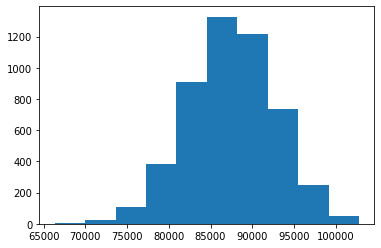

In [79]:
import matplotlib.pyplot as plt 

plt.hist(values)

In [334]:
import math

class temperature_scheduling:
    
    def __init__(self,initial_temperature,min_temperature,gamma):
        self.initial_temperature=initial_temperature
        self.min_temperature=min_temperature
        self.temperature=initial_temperature
        self.gamma=gamma
        
    def exponential_decay(self):
        self.temperature=self.gamma*self.temperature
        return max(self.temperature,self.min_temperature)
    
    def fast_decay(self,k):
        self.temperature=self.initial_temperature/k
        return max(self.temperature,self.min_temperature)
    
    def logarithmic_decay(self,k):
        self.temperature=self.initial_temperature*math.log(2)/math.log(k)
        return max(self.temperature,self.min_temperature)

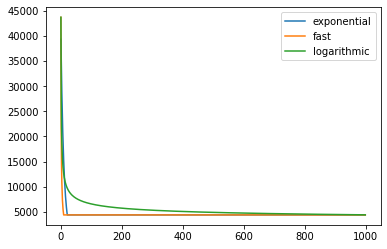

In [292]:
import pandas as pd
epochs=int(1e3)

decays={'exponential':[],'fast':[],'logarithmic':[]}
delta=1.2*(max(values)-min(values))
t1=temperature_scheduling(delta,delta/10,0.9)
t2=temperature_scheduling(delta,delta/10,0.9)
t3=temperature_scheduling(delta,delta/10,0.9)
for k in range(1,epochs):
    decays['exponential'].append(t1.exponential_decay())
    decays['fast'].append(t2.fast_decay(k))
    decays['logarithmic'].append(t3.logarithmic_decay(k))


pd.DataFrame(decays).plot()

In [264]:
pd.DataFrame(decays).head()

,exponential,fast,logarithmic
0,36442.548464,36442.584906,36442.584906
1,36442.512021,18221.292453,22992.711114
2,36442.475578,12147.528302,18221.292453
3,36442.439136,9110.646227,15694.967035
4,36442.402694,7288.516981,14097.916274


In [286]:
pd.DataFrame(decays).tail()

,exponential,fast,logarithmic
994,36406.342550,3644.258491,3658.893357
995,36406.306143,3644.258491,3658.361586
996,36406.269737,3644.258491,3657.830503
997,36406.233331,3644.258491,3657.300105
998,36406.196924,3644.258491,3656.770392


In [266]:
def mutation(current):
    i,j=np.random.randint(0,len(current),size=2)
    new=current.copy()
    new[i]=current[j]
    new[j]=current[i]
    return new

In [280]:
k=1-1e-4
initial_temperature=1.2*(max(values)-min(values))
min_temp=initial_temperature/10

current=np.random.permutation(coords).tolist()
current_value=make_cycle(current)
temp=temperature_scheduling(initial_temperature,min_temp,k)
epochs=int(1e4)
loss=[]
accept_rate=0
for i in range(1,epochs):
    new=mutation(current)
    next_value=make_cycle(new)
    delta = (next_value-current_value)
    T=temp.logarithmic_decay(i)
    if delta>0:
        current=new
        accept_rate+=1
    else:
        alpha=min(1,np.exp(-1.0*delta/T))
        if alpha>np.random.random():
            current=new
            current_value=next_value
            accept_rate+=1
    loss.append(current_value)
    accept_rate=accept_rate/epochs

In [283]:
delta

24740.33238960775

In [284]:
T

4373.110188730731

In [285]:
np.exp(-delta/T)

0.00349166401811357

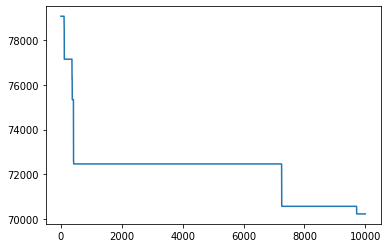

In [274]:
plt.plot(loss)